# Librerías

In [ ]:
!git clone https://github.com/JuanPabloAbril/healthy-skin-Team.git

Cloning into 'healthy-skin-Team'...
remote: Enumerating objects: 2364, done.
remote: Counting objects: 100% (2364/2364), done.
remote: Compressing objects: 100% (2359/2359), done.
remote: Total 2364 (delta 49), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (2364/2364), 752.59 MiB | 25.06 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Updating files: 100% (2359/2359), done.


In [ ]:
import os
import glob
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GlobalMaxPooling2D ,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.resnet50 import ResNet50
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import seaborn as sns
import pandas as pd

# Importando los datos

In [ ]:
train_dir = pathlib.Path("./healthy-skin-Team/Entrenamiento/")
test_dir = pathlib.Path("./healthy-skin-Team/test/")

In [ ]:
print('Número de imágenes de entrenamiento',len(list(train_dir.glob('*/*.jpg'))))
print('Número de imágenes de test',len(list(test_dir.glob('*/*.jpg'))))

Número de imágenes de entrenamiento 2239
Número de imágenes de test 118


# Preprocesamiento

In [ ]:
batch_size = 32
img_height = 224
img_width = 224
rnd_seed = 0

In [ ]:
gen = ImageDataGenerator(
    rescale=1/255,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
train_gen = gen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 1795 images belonging to 9 classes.


In [ ]:
test_gen = gen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 444 images belonging to 9 classes.


In [ ]:
val_gen = gen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 118 images belonging to 9 classes.


In [ ]:
class_labels = train_gen.class_indices
class_labels = {v: k for k, v in class_labels.items()}

In [ ]:
class_labels

{0: 'carcinoma_celulas_basales',
 1: 'carcinoma_celulas_escamosas',
 2: 'dermatofibroma',
 3: 'lesion_vascular',
 4: 'melanoma',
 5: 'nevus',
 6: 'queratosis_actinica',
 7: 'queratosis_benigna_pigmentada',
 8: 'queratosis_seborreica'}

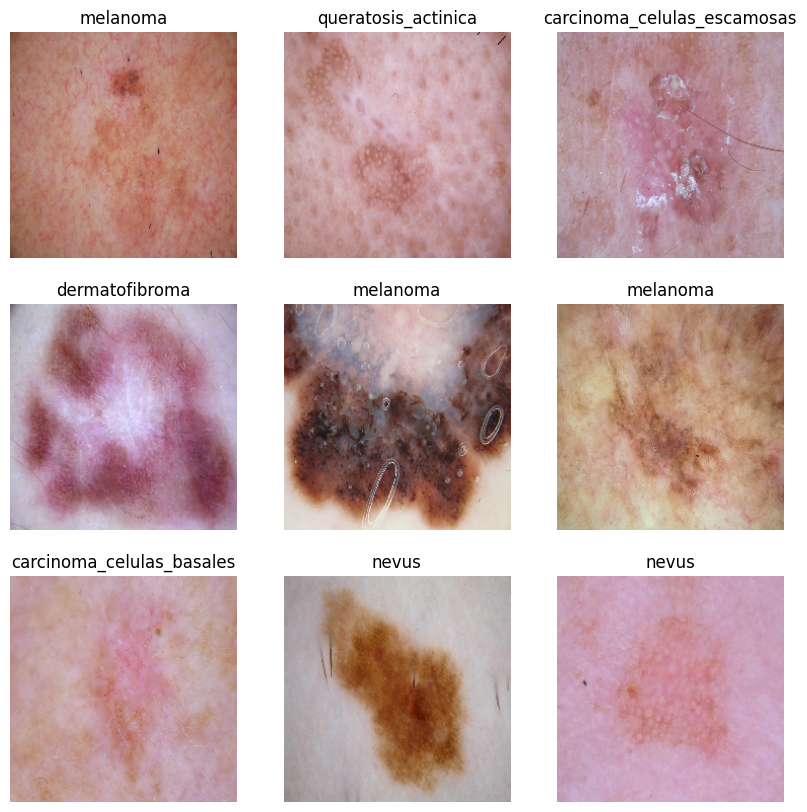

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image, label = train_gen[0][0][i], train_gen[0][1][i]
  plt.imshow(image)
  plt.title(class_labels[list(label).index(1)])
  plt.axis("off")
plt.show()

In [ ]:
def plot_history(my_summary):
  acc = my_summary.history['accuracy']
  val_acc = my_summary.history['val_accuracy']

  loss = my_summary.history['loss']
  val_loss = my_summary.history['val_loss']

  epochs_range = range(epochs)

  #plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Entrenamiento', c="b")
  plt.plot(epochs_range, val_acc, label='Validación', c="g")
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Entrenamiento', c="b")
  plt.plot(epochs_range, val_loss, label='Validación', c="g")
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.show()

# Modelo Versión 1

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(9, activation='softmax')])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
epochs = 20

In [ ]:
my_summary = model.fit(train_gen,epochs=epochs,validation_data=test_gen)

Epoch 1/20
57/57 [==============================] - 31s 393ms/step - loss: 27.3139 - accuracy: 0.2875 - val_loss: 43.4620 - val_accuracy: 0.0608
Epoch 2/20
57/57 [==============================] - 21s 371ms/step - loss: 8.1222 - accuracy: 0.2953 - val_loss: 48.0809 - val_accuracy: 0.0833
Epoch 3/20
57/57 [==============================] - 20s 354ms/step - loss: 4.5760 - accuracy: 0.2986 - val_loss: 44.3504 - val_accuracy: 0.0811
Epoch 4/20
57/57 [==============================] - 21s 371ms/step - loss: 3.9840 - accuracy: 0.2925 - val_loss: 19.5069 - val_accuracy: 0.1104
Epoch 5/20
57/57 [==============================] - 21s 374ms/step - loss: 3.7473 - accuracy: 0.3092 - val_loss: 13.8584 - val_accuracy: 0.1622
Epoch 6/20
57/57 [==============================] - 20s 358ms/step - loss: 3.5485 - accuracy: 0.3409 - val_loss: 12.3729 - val_accuracy: 0.1667
Epoch 7/20
57/57 [==============================] - 21s 373ms/step - loss: 3.5377 - accuracy: 0.3376 - val_loss: 6.1437 - val_accuracy:

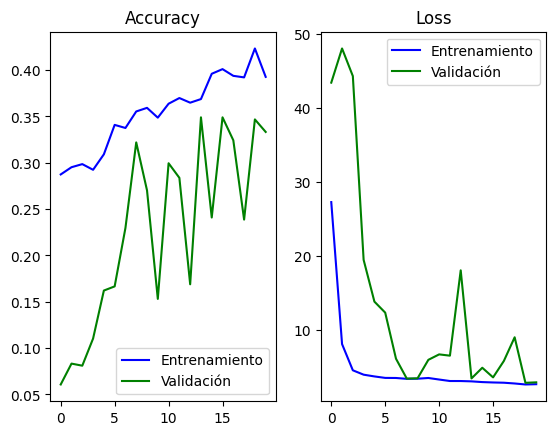

In [ ]:
plot_history(my_summary)

# Balanceo



In [ ]:
class_names = list(train_gen.class_indices.keys())

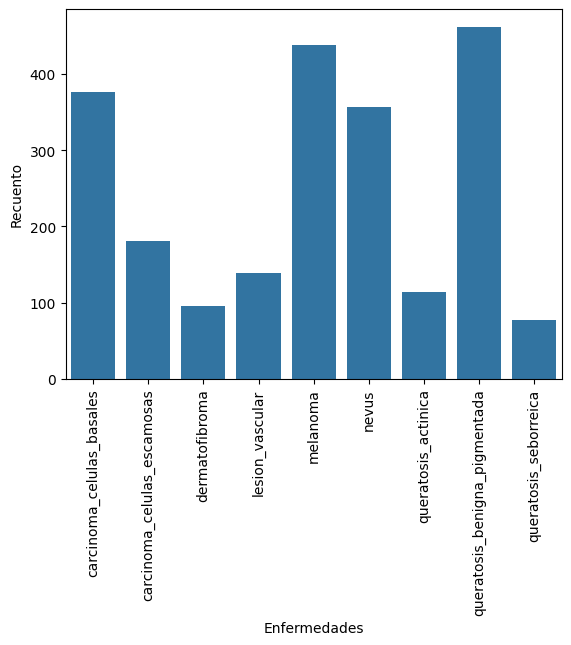

In [ ]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []
for i in range(num_classes):
  count = len(list(train_dir.glob(class_names[i]+'/*.jpg')))
  total += count

for i in range(num_classes):
  count = len(list(train_dir.glob(class_names[i]+'/*.jpg')))
  all_count.append(count)
  class_name.append(class_names[i])

temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.ylabel('Recuento')
plt.xlabel('Enfermedades')
plt.xticks(rotation=90)
plt.show()

In [ ]:
!pip install Augmentor

In [ ]:
path_to_training_dataset = ("./healthy-skin-Team/Entrenamiento/")
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory='./data/'+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 376 image(s) found.
Output directory set to ./healthy-skin-Team/Entrenamiento/carcinoma_celulas_basales/./data/carcinoma_celulas_basales.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C96FFF35C00>: 100%|██████████| 500/500 [00:13<00:00, 36.02 Samples/s]


Initialised with 181 image(s) found.
Output directory set to ./healthy-skin-Team/Entrenamiento/carcinoma_celulas_escamosas/./data/carcinoma_celulas_escamosas.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C96FFC1BE50>: 100%|██████████| 500/500 [00:13<00:00, 35.93 Samples/s]


Initialised with 95 image(s) found.
Output directory set to ./healthy-skin-Team/Entrenamiento/dermatofibroma/./data/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C96FFED6650>: 100%|██████████| 500/500 [00:14<00:00, 34.02 Samples/s]


Initialised with 139 image(s) found.
Output directory set to ./healthy-skin-Team/Entrenamiento/lesion_vascular/./data/lesion_vascular.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C96FFF35C00>: 100%|██████████| 500/500 [00:14<00:00, 35.16 Samples/s]


Initialised with 438 image(s) found.
Output directory set to ./healthy-skin-Team/Entrenamiento/melanoma/./data/melanoma.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C9780B82680>: 100%|██████████| 500/500 [01:23<00:00,  5.99 Samples/s]


Initialised with 357 image(s) found.
Output directory set to ./healthy-skin-Team/Entrenamiento/nevus/./data/nevus.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7C9780B80160>: 100%|██████████| 500/500 [01:10<00:00,  7.14 Samples/s]


Initialised with 114 image(s) found.
Output directory set to ./healthy-skin-Team/Entrenamiento/queratosis_actinica/./data/queratosis_actinica.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C96FFC6CCD0>: 100%|██████████| 500/500 [00:14<00:00, 34.66 Samples/s]


Initialised with 462 image(s) found.
Output directory set to ./healthy-skin-Team/Entrenamiento/queratosis_benigna_pigmentada/./data/queratosis_benigna_pigmentada.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C96FFFDB2B0>: 100%|██████████| 500/500 [00:14<00:00, 33.63 Samples/s]


Initialised with 77 image(s) found.
Output directory set to ./healthy-skin-Team/Entrenamiento/queratosis_seborreica/./data/queratosis_seborreica.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C96FFED74F0>: 100%|██████████| 500/500 [00:34<00:00, 14.51 Samples/s]


In [ ]:
output_dir = pathlib.Path('./healthy-skin-Team/Entrenamiento/')
image_count_train = len(list(output_dir.glob('*/data/*/*.jpg')))
print(image_count_train)

4500


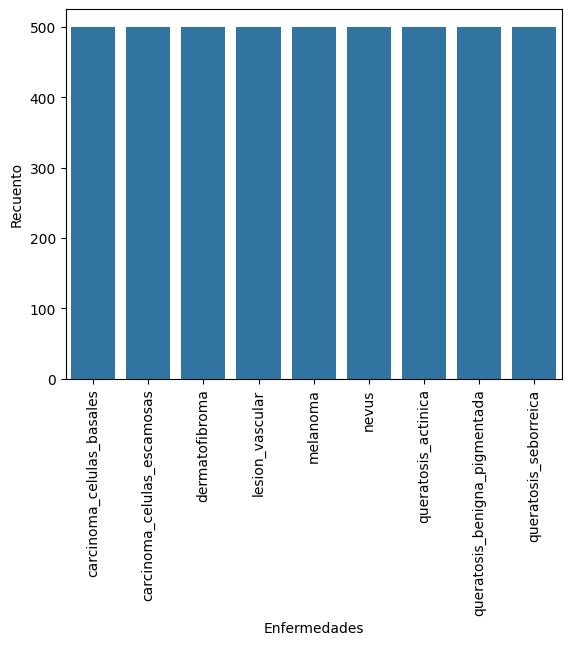

In [ ]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []

for i in range(num_classes):
  count = len(list(output_dir.glob('*/data/'+class_names[i]+'/*.jpg')))
  total += count
for i in range(num_classes):
  count = len(list(output_dir.glob('*/data/'+class_names[i]+'/*.jpg')))
  all_count.append(count)
  class_name.append(class_names[i])

temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.ylabel('Recuento')
plt.xlabel('Enfermedades')
plt.xticks(rotation=90)
plt.show()

# Modelo Versión 2

In [ ]:
train_balan = gen.flow_from_directory(
    output_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 5395 images belonging to 9 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3),kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding="same",kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding="same",  kernel_regularizer=l2(0.01)),
    Dropout(0.25),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding="same", kernel_regularizer=l2(0.01)),
    Dropout(0.25),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(9, activation='softmax')])

In [ ]:
epochs = 20
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 222, 222, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 111, 111, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
my_summary = model.fit(train_balan, epochs=epochs, batch_size = batch_size, validation_data=test_gen)

Epoch 1/20
169/169 [==============================] - 46s 245ms/step - loss: 10.3407 - accuracy: 0.3961 - val_loss: 8.0598 - val_accuracy: 0.0608
Epoch 2/20
169/169 [==============================] - 38s 222ms/step - loss: 5.4569 - accuracy: 0.5177 - val_loss: 4.6511 - val_accuracy: 0.0608
Epoch 3/20
169/169 [==============================] - 38s 223ms/step - loss: 3.2511 - accuracy: 0.5765 - val_loss: 2.8940 - val_accuracy: 0.2185
Epoch 4/20
169/169 [==============================] - 39s 231ms/step - loss: 2.1749 - accuracy: 0.6172 - val_loss: 1.8619 - val_accuracy: 0.5541
Epoch 5/20
169/169 [==============================] - 38s 226ms/step - loss: 1.6097 - accuracy: 0.6617 - val_loss: 1.4384 - val_accuracy: 0.6104
Epoch 6/20
169/169 [==============================] - 38s 225ms/step - loss: 1.2850 - accuracy: 0.6823 - val_loss: 1.1884 - val_accuracy: 0.6329
Epoch 7/20
169/169 [==============================] - 38s 225ms/step - loss: 1.0799 - accuracy: 0.7116 - val_loss: 1.0204 - val_a

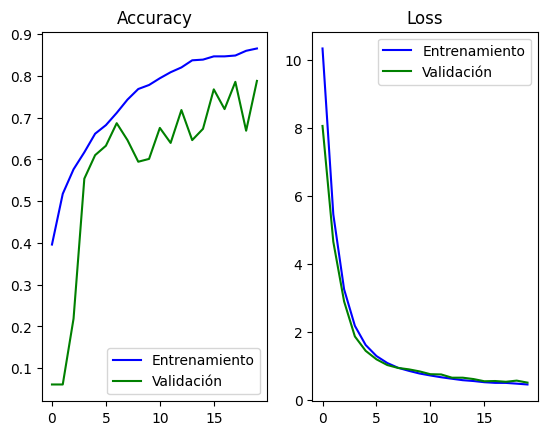

In [ ]:
plot_history(my_summary)

# Modelo Versión 3 ResNet

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 12
epochs = 10

In [ ]:
my_summary = model.fit(train_gen,epochs=epochs, batch_size = batch_size, validation_split = 0.2, verbose = 1,validation_data=test_gen)

In [ ]:
plot_history(my_summary)

# Modelo Versión 4 VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 10

In [ ]:
my_summary = model.fit(train_gen, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1, validation_data=test_gen)

In [ ]:
plot_history(my_summary)

# Modelo Versión 5 Inception

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 10

In [ ]:
my_summary = model.fit(train_gen, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1, validation_data=test_gen)

In [ ]:
plot_history(my_summary)

# Guardando el modelo

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Cargando el modelo

In [ ]:
pip install tensorflow

In [ ]:
image_path = 'ISIC_0024332.jpg'
model = tf.keras.models.load_model('model.h5')

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
tipos = ['carcinoma_celulas_basales',
 'carcinoma_celulas_escamosas',
 'dermatofibroma',
 'lesion_vascular',
 'melanoma',
 'nevus',
 'queratosis_actinica',
 'queratosis_benigna_pigmentada',
 'queratosis_seborreica']

img = cv2.imread(image_path)
img = tf.image.resize(img, (224, 224))
img = img / 255
img = np.expand_dims(img, axis=0)

prediccion = model.predict(img)
predict= tipos[list(prediccion[0]).index(max(prediccion[0]))]
negrita = "\033[1m"
reset = "\033[0m"
print(f"Tipo: {negrita}{predict}{reset}\nCon una probabilidad del: {max(prediccion[0])*100:.2f}%")

1/1 [==============================] - 0s 484ms/step
Tipo: lesion_vascular
Con una probabilidad del: 97.27%
